# Linear Regression for a housing dataset

In [1]:
import numpy as np
from matplotlib import pyplot as plt

import random
import utils

In [2]:
features = np.array([1, 2, 3, 5, 6, 7])
labels = np.array([155, 197, 244, 356,407,448])

print(features)
print(labels)

[1 2 3 5 6 7]
[155 197 244 356 407 448]


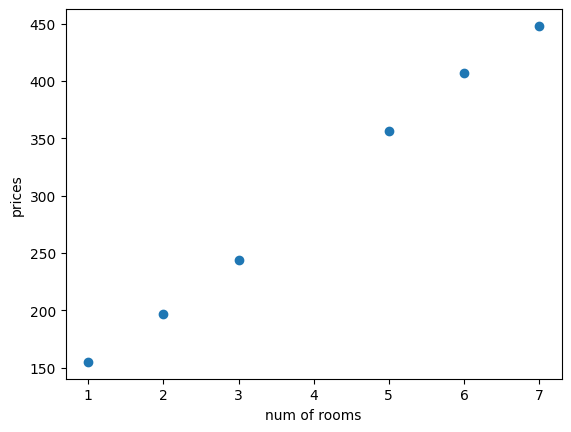

In [3]:
utils.plot_points(features, labels)

## Square trick

In [4]:
def square_trick(base_price
                 , price_per_room
                 , num_rooms
                 , price
                 , learning_rate):
    predicted_price = base_price + price_per_room * num_rooms
    price_per_room += learning_rate * num_rooms* (price - predicted_price)
    base_price += learning_rate * (price - predicted_price)
    return price_per_room, base_price


## Absolute trick

In [5]:
def absolute_trick(base_price
                   , price_per_room
                   , num_rooms
                   , price
                   , learning_rate):
    predicted_price = base_price + num_rooms * price_per_room
    if price > predicted_price:
        price_per_room += learning_rate * num_rooms
        base_price += learning_rate
    else:
        price_per_room -= learning_rate * num_rooms
        base_price -= learning_rate
    return price_per_room, base_price

Price per room: 51.04430678220095
Base price: 91.59448307644864


(np.float64(51.04430678220095), np.float64(91.59448307644864))

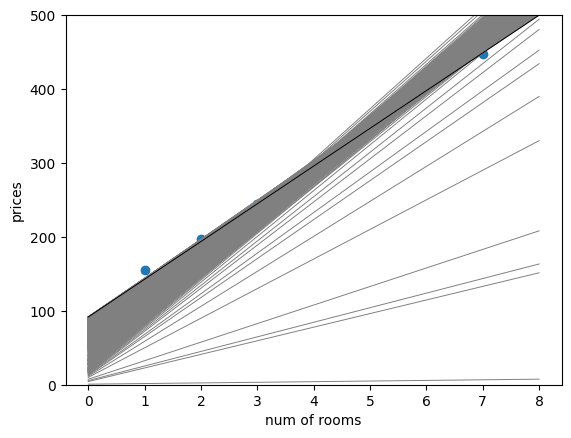

In [6]:
# We set the random seed in order to always get the same results.
random.seed(0)

def linear_regression(features, labels, learning_rate=0.01, epochs = 1000):
    price_per_room = random.random()
    base_price = random.random()
    for epoch in range(epochs):
        # Uncomment any of the following lines to plot different epochs
        #if epoch == 1:
        #if epoch <= 10:
        #if epoch <= 50:
        #if epoch > 50:
        if True:
            utils.draw_line(price_per_room, base_price, starting=0, ending=8)
        i = random.randint(0, len(features)-1)
        num_rooms = features[i]
        price = labels[i]
        # Uncomment any of the 2 following lines to use a different trick
        #price_per_room, base_price = absolute_trick(base_price,
        price_per_room, base_price = square_trick(base_price,
                                                  price_per_room,
                                                  num_rooms,
                                                  price,
                                                  learning_rate=learning_rate)
    utils.draw_line(price_per_room, base_price, 'black', starting=0, ending=8)
    utils.plot_points(features, labels)
    print('Price per room:', price_per_room)
    print('Base price:', base_price)
    return price_per_room, base_price

# This line is for the x-axis to appear in the figure
plt.ylim(0,500)

linear_regression(features, labels, learning_rate = 0.01, epochs = 1000)